<a href="https://colab.research.google.com/github/shimo23333/generative_ai/blob/main/%E4%BD%BF%E7%94%A8_CLIP_%E6%A8%A1%E5%9E%8B%E5%8F%AF%E8%A6%96%E5%8C%96%E4%B8%AD%E8%8B%B1%E6%96%87%E6%83%85%E7%B7%92%E8%A9%9E%E5%BD%99%E7%9A%84%E8%AA%9E%E6%84%8F%E5%B7%AE%E7%95%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.安裝必要套件
使用 OpenAI 所提供的 CLIP 模型來比較中英文情緒詞彙在語意空間中的差異。

透過 Colab 安裝必要的 Python 套件，包括 OpenAI 的 CLIP 模型，以及文字處理與進度條等輔助工具。
對情緒詞彙進行編碼並進行後續的可視化分析。

In [9]:
# 安裝 CLIP 模型與其依賴套件
!pip install git+https://github.com/openai/CLIP.git
!pip install ftfy regex tqdm matplotlib scikit-learn
!apt-get -y install fonts-noto-cjk  # 安裝中文字體（Colab 專用）

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-0_3a83ur
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-0_3a83ur
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


# 2.載入模型並進行情緒詞嵌入與可視化

In [10]:
# 匯入套件
import clip
import torch
import matplotlib.pyplot as plt
import numpy as np

# 設定中文顯示字體（避免亂碼）
plt.rcParams['font.family'] = 'Noto Sans CJK JP'  # 使用思源黑體顯示中文
plt.rcParams['axes.unicode_minus'] = False        # 解決負號顯示問題

# 載入 CLIP 模型（使用 ViT-B/32）
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# 定義中英文情緒詞（可自行擴充）
texts = [
    "joy", "sadness", "anger", "fear", "love", "peace",
    "喜悅", "悲傷", "憤怒", "恐懼", "愛", "平靜"
]

# 將文字轉成 CLIP 模型的向量表示（Text Embedding）
with torch.no_grad():
    text_tokens = clip.tokenize(texts).to(device)            # 編碼文字
    text_embeddings = model.encode_text(text_tokens)         # 產生嵌入向量


# 3.使用 t-SNE 將高維向量降為 2 維並畫圖

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21916 (\N{CJK UNIFIED IDEOGRAPH-559C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24709 (\N{CJK UNIFIED IDEOGRAPH-6085}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24754 (\N{CJK UNIFIED IDEOGRAPH-60B2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20663 (\N{CJK UNIFIED IDEOGRAPH-50B7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24996 (\N{CJK UNIFIED IDEOGRAPH-61A4}) missing from font(s) DejaVu Sans.
  fig.canvas

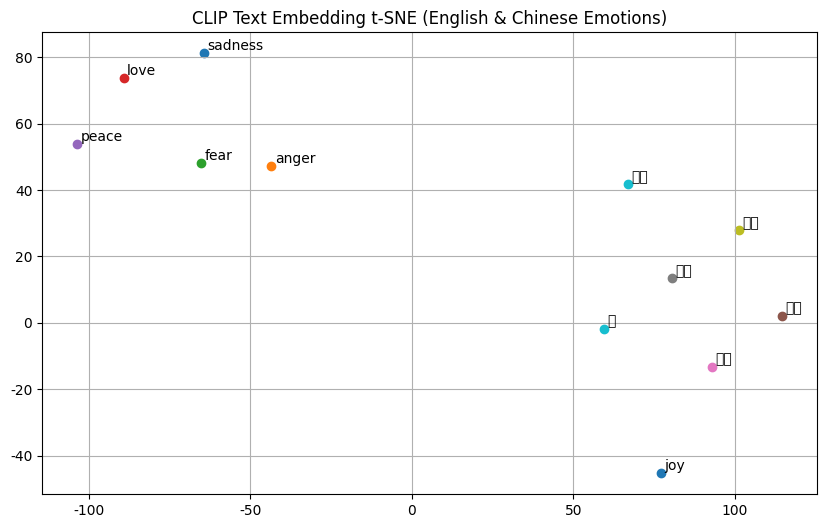

In [11]:
from sklearn.manifold import TSNE

# 使用 t-SNE 進行降維（將高維向量降為 2 維）
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
text_embeddings_2d = tsne.fit_transform(text_embeddings.cpu().numpy())

# 視覺化：繪製 t-SNE 結果
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, len(texts)))  # 使用不同顏色

# 畫點與標籤文字
for i, (x, y) in enumerate(text_embeddings_2d):
    plt.scatter(x, y, color=colors[i])
    plt.text(x + 1, y + 1, texts[i], fontsize=10)

# 圖表設定
plt.title("CLIP Text Embedding t-SNE (English & Chinese Emotions)")
plt.grid(True)
plt.show()
